<a href="https://colab.research.google.com/github/suptykarmokarcse/weather-d/blob/main/milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 3: Frequency Distribution and Data Visualization

---

**Name:** [Supty karmokar]

**ID:** [242014058]

---

In [ ]:
!pip install pandas numpy matplotlib seaborn

## Part 1: Data Loading and Preparation

In this section, we will load the dataset and import the necessary libraries for our analysis.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Used for enhanced visualization aesthetics

# Set seaborn style for better-looking charts
sns.set_style('whitegrid')

# Load the dataset
try:
    df = pd.read_csv('weatherHistory.csv')
    print("Dataset loaded successfully.")

    # Display initial information and data structure
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Information:")
    df.info()

except FileNotFoundError:
    print("Error: 'weatherHistory.csv' not found. Please ensure the file is in the correct directory.")
    df = None # Set df to None if not found, to prevent NameError if further code tries to access it




Dataset loaded successfully.

First 5 rows of the dataset:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                  

## Part 2: Frequency Distribution Table

Here, we will select a column and construct a frequency distribution table.

Justification:The reason for choosing the 'Temperature' column  because it can give me different kinds of variable and understanding. its distribution can provide point of view for  this dataset.

In [ ]:
# --- Task 1: Frequency Distribution Table Construction ---

column_name = 'Temperature (C)'
data = df[column_name].dropna() # Use the Temperature (C) column and drop any potential NaN values

# 1. Determine the optimal number of bins (Class Intervals)
# Using Sturges' formula: k = 1 + log2(n)
n = len(data)
# We will use k=15 for a good balance between detail and readability
num_bins = 15

# 2. Group the data into class intervals using pd.cut
bins = pd.cut(data, bins=num_bins, include_lowest=True)

# 3. Create the Frequency Distribution DataFrame
frequency_table = pd.DataFrame(bins.value_counts().sort_index())
frequency_table.columns = ['Frequency (f)']
N = frequency_table['Frequency (f)'].sum() # Total number of observations

# 4. Calculate Relative Frequency (rf)
frequency_table['Relative Frequency (rf)'] = frequency_table['Frequency (f)'] / N

# 5. Calculate Cumulative Frequency (cf)
frequency_table['Cumulative Frequency (cf)'] = frequency_table['Frequency (f)'].cumsum()

# 6. Calculate Relative Cumulative Frequency (rcf)
frequency_table['Relative Cumulative Frequency (rcf)'] = frequency_table['Relative Frequency (rf)'].cumsum()

# 7. Add Class Midpoints and Upper Boundaries for plotting

# Helper function to get the midpoint of an interval
def get_midpoint(interval):
    return (interval.left + interval.right) / 2

# Helper function to get the upper boundary of an interval
def get_upper_boundary(interval):
    return interval.right

frequency_table['Class Midpoint'] = frequency_table.index.map(get_midpoint)
frequency_table['Upper Boundary'] = frequency_table.index.map(get_upper_boundary)

# Display the final frequency distribution table
print(f"Frequency Distribution Table for '{column_name}' (k={num_bins} bins):")
print(frequency_table.to_string()) # Use to_string() to display all rows

Frequency Distribution Table for 'Temperature (C)' (k=15 bins):
                    Frequency (f)  Relative Frequency (rf)  Cumulative Frequency (cf)  Relative Cumulative Frequency (rcf) Class Midpoint Upper Boundary
Temperature (C)                                                                                                                                         
(-14.141, -10.674]             61                 0.004959                         61                             0.004959       -12.4075        -10.674
(-10.674, -7.26]               84                 0.006829                        145                             0.011789        -8.9670         -7.260
(-7.26, -3.846]               494                 0.040163                        639                             0.051951        -5.5530         -3.846
(-3.846, -0.431]             1104                 0.089756                       1743                             0.141707        -2.1385         -0.431
(-0.431, 2.983]   

## Part 3: Graphical Representation

In this section, we will visualize the data distribution using various charts.

### 3.1 Bar Chart / Histogram, Polygon and Ogive graphs for Temperature

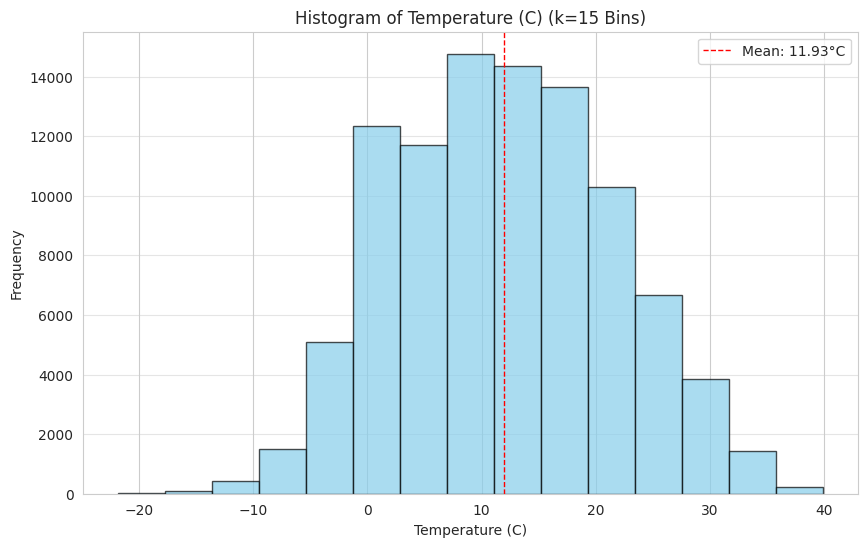

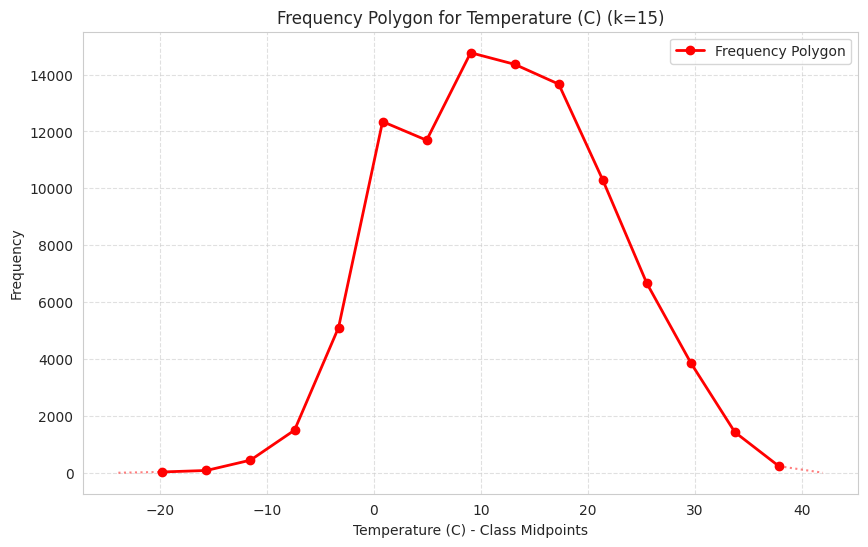

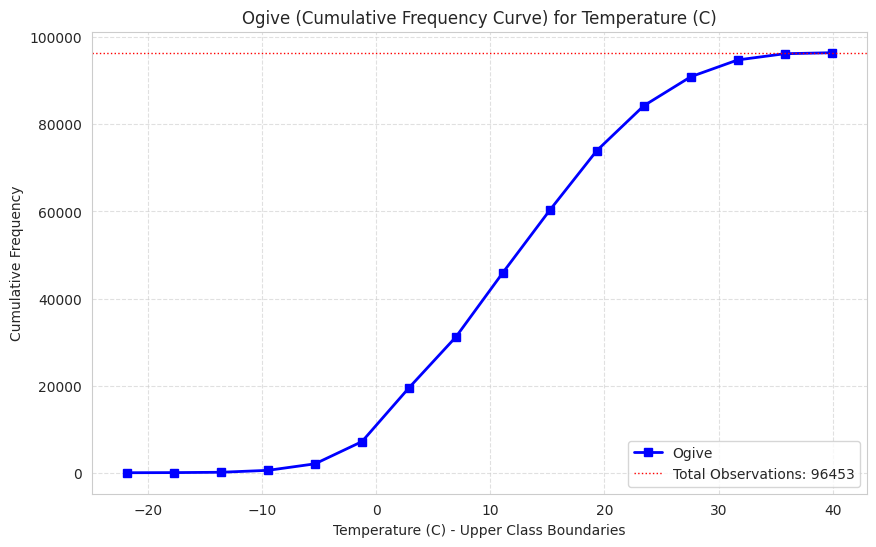

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SETUP AND DATA PREPARATION ---

# Load the dataset
df = pd.read_csv('weatherHistory.csv')
temperature_data = df['Temperature (C)']

# Define the number of bins (classes)
k = 15

# Calculate bin edges
min_temp = temperature_data.min()
max_temp = temperature_data.max()
bin_width = (max_temp - min_temp) / k
bins = np.arange(min_temp, max_temp + bin_width, bin_width)

# Calculate frequencies and bin edges for subsequent plots
counts, bin_edges = np.histogram(temperature_data, bins=bins)

# ----------------------------------------

# --- 2. HISTOGRAM FOR TEMPERATURE (C) ---
# A histogram shows the frequency distribution of the data.
plt.figure(figsize=(10, 6))
plt.hist(temperature_data, bins=bins, edgecolor='black', alpha=0.7, color='skyblue')

plt.title(f'Histogram of Temperature (C) (k={k} Bins)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.axvline(temperature_data.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {temperature_data.mean():.2f}°C')
plt.legend()
plt.savefig('temperature_histogram.png')
plt.show() # Note: In a notebook, use plt.show() or simply the last line of the cell

# ----------------------------------------

# --- 3. FREQUENCY POLYGON FOR TEMPERATURE (C) ---
# A frequency polygon connects the midpoints of the class intervals at their frequency.
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(bin_midpoints, counts, marker='o', linestyle='-', color='red', linewidth=2, label='Frequency Polygon')

# Connect to the x-axis for full closure (optional but standard practice)
plt.plot([bin_midpoints[0] - bin_width, bin_midpoints[0]], [0, counts[0]], ':', color='red', alpha=0.5)
plt.plot([bin_midpoints[-1], bin_midpoints[-1] + bin_width], [counts[-1], 0], ':', color='red', alpha=0.5)

plt.title(f'Frequency Polygon for Temperature (C) (k={k})')
plt.xlabel('Temperature (C) - Class Midpoints')
plt.ylabel('Frequency')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend()
plt.savefig('temperature_frequency_polygon.png')
plt.show()

# ----------------------------------------

# --- 4. OGIVE (CUMULATIVE FREQUENCY) FOR TEMPERATURE (C) ---
# An Ogive shows the cumulative frequency, useful for finding percentiles.
cumulative_counts = np.cumsum(counts)

# Prepend 0 for the starting point at the lower bound of the first class
cumulative_counts_with_zero = np.insert(cumulative_counts, 0, 0)

# The plot points are the bin edges (upper boundaries)
plot_points = bin_edges

plt.figure(figsize=(10, 6))
plt.plot(plot_points, cumulative_counts_with_zero, marker='s', linestyle='-', color='blue', linewidth=2, label='Ogive')

plt.title(f'Ogive (Cumulative Frequency Curve) for Temperature (C)')
plt.xlabel('Temperature (C) - Upper Class Boundaries')
plt.ylabel('Cumulative Frequency')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.axhline(df.shape[0], color='red', linestyle=':', linewidth=1, label=f'Total Observations: {df.shape[0]}')
plt.legend()
plt.savefig('temperature_ogive.png')
plt.show()

### 3.2 Bar Chart / Histogram, Polygon and Ogive graphs for Wind speed

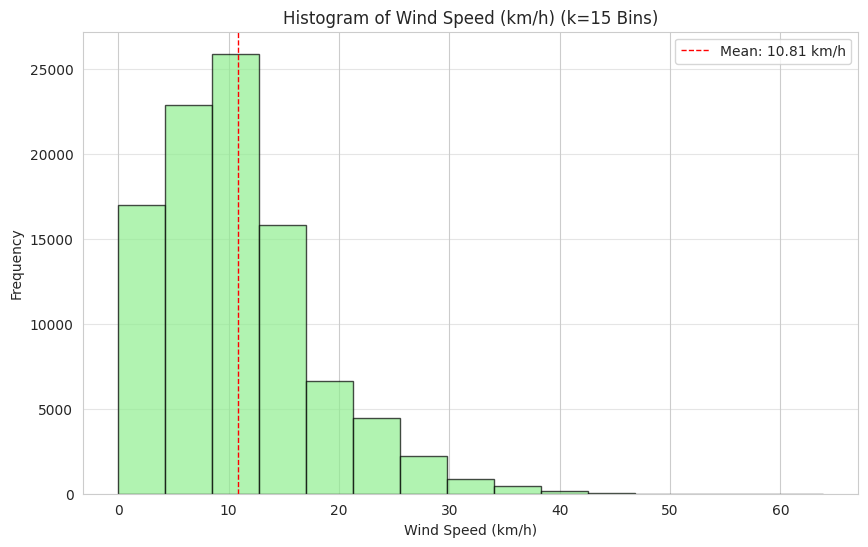

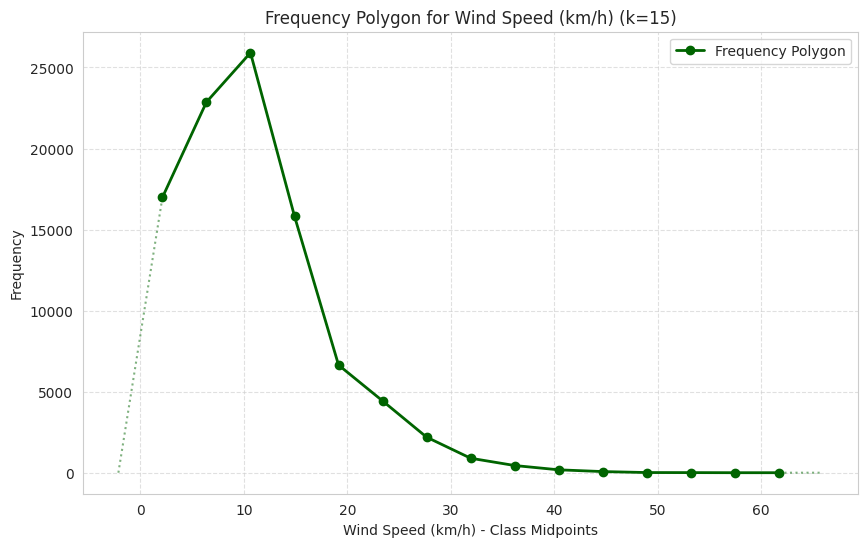

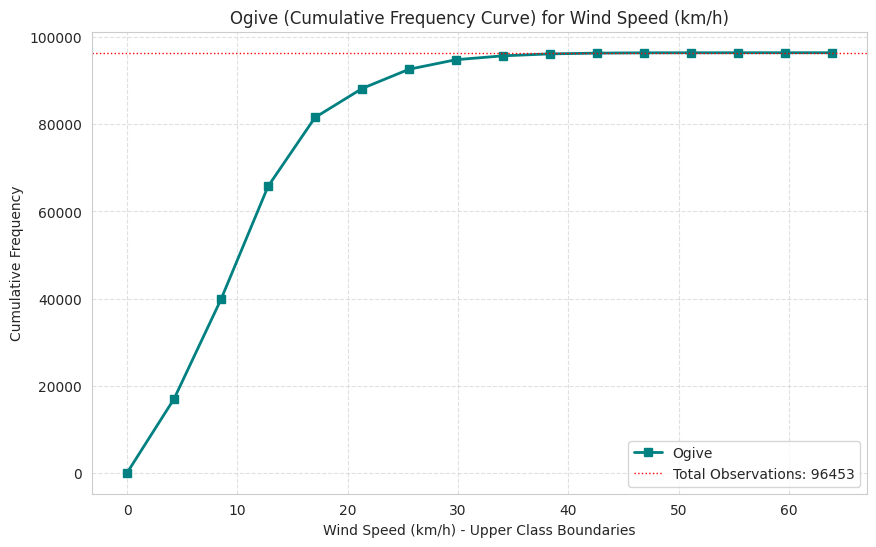

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SETUP AND DATA PREPARATION ---

# Load the dataset (ensuring df is available for this cell)
try:
    df = pd.read_csv('weatherHistory.csv')
except FileNotFoundError:
    print("Error: 'weatherHistory.csv' not found. Please ensure the file is in the correct directory.")
    df = None # Set df to None if not found to prevent further errors

if df is not None:
    wind_speed_data = df['Wind Speed (km/h)']

    # Define the number of bins (classes)
    k = 15

    # Calculate bin edges
    min_speed = wind_speed_data.min()
    max_speed = wind_speed_data.max()
    bin_width = (max_speed - min_speed) / k
    bins = np.arange(min_speed, max_speed + bin_width, bin_width)

    # Calculate frequencies and bin edges for subsequent plots
    counts, bin_edges = np.histogram(wind_speed_data, bins=bins)

    # ----------------------------------------

    # --- 2. HISTOGRAM FOR WIND SPEED (km/h) ---
    # Shows the distribution of wind speed.
    plt.figure(figsize=(10, 6))
    plt.hist(wind_speed_data, bins=bins, edgecolor='black', alpha=0.7, color='lightgreen')

    plt.title(f'Histogram of Wind Speed (km/h) (k={k} Bins)')
    plt.xlabel('Wind Speed (km/h)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.axvline(wind_speed_data.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {wind_speed_data.mean():.2f} km/h')
    plt.legend()
    plt.savefig('wind_speed_histogram.png')
    plt.show()

    # ----------------------------------------

    # --- 3. FREQUENCY POLYGON FOR WIND SPEED (km/h) ---
    # Connects the midpoints of the class intervals at their frequency.
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.figure(figsize=(10, 6))
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-', color='darkgreen', linewidth=2, label='Frequency Polygon')

    # Connect to the x-axis for full closure
    plt.plot([bin_midpoints[0] - bin_width, bin_midpoints[0]], [0, counts[0]], ':', color='darkgreen', alpha=0.5)
    plt.plot([bin_midpoints[-1], bin_midpoints[-1] + bin_width], [counts[-1], 0], ':', color='darkgreen', alpha=0.5)

    plt.title(f'Frequency Polygon for Wind Speed (km/h) (k={k})')
    plt.xlabel('Wind Speed (km/h) - Class Midpoints')
    plt.ylabel('Frequency')
    plt.grid(axis='both', linestyle='--', alpha=0.6)
    plt.legend()
    plt.savefig('wind_speed_frequency_polygon.png')
    plt.show()

    # ----------------------------------------

    # --- 4. OGIVE (CUMULATIVE FREQUENCY) FOR WIND SPEED (km/h) ---
    # Shows the running total of observations below each upper class boundary.
    cumulative_counts = np.cumsum(counts)

    # Prepend 0 for the starting point
    cumulative_counts_with_zero = np.insert(cumulative_counts, 0, 0)
    plot_points = bin_edges

    plt.figure(figsize=(10, 6))
    plt.plot(plot_points, cumulative_counts_with_zero, marker='s', linestyle='-', color='teal', linewidth=2, label='Ogive')

    plt.title(f'Ogive (Cumulative Frequency Curve) for Wind Speed (km/h)')
    plt.xlabel('Wind Speed (km/h) - Upper Class Boundaries')
    plt.ylabel('Cumulative Frequency')
    plt.grid(axis='both', linestyle='--', alpha=0.6)
    plt.axhline(df.shape[0], color='red', linestyle=':', linewidth=1, label=f'Total Observations: {df.shape[0]}')
    plt.legend()
    plt.savefig('wind_speed_ogive.png')
    plt.show()

### 3.3 Bar Chart / Histogram, Polygon and Ogive graphs for Visibility

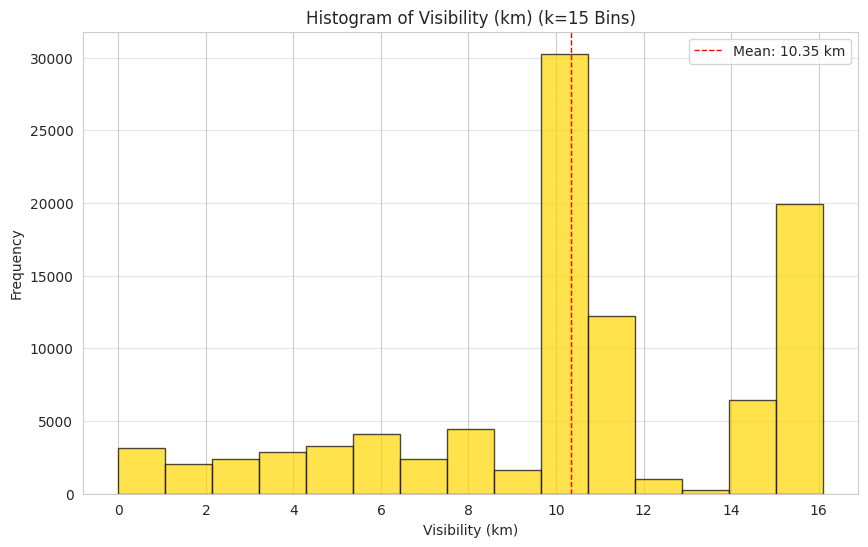

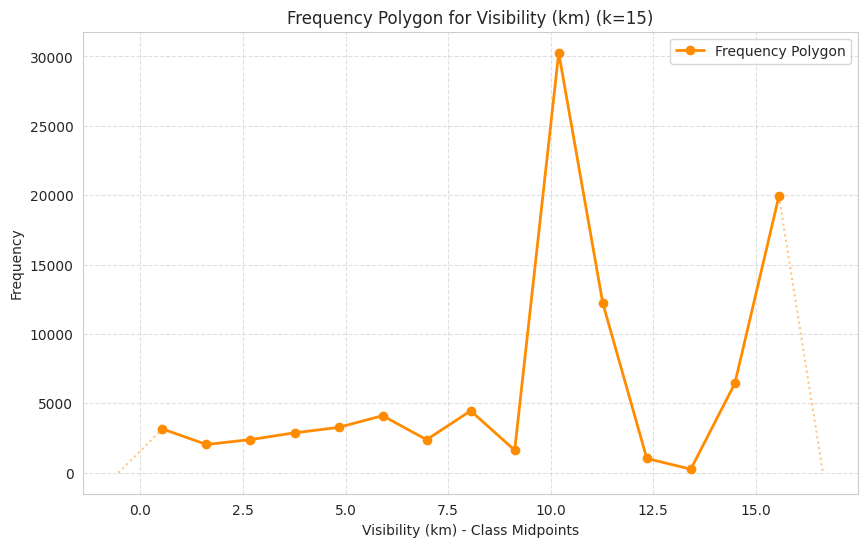

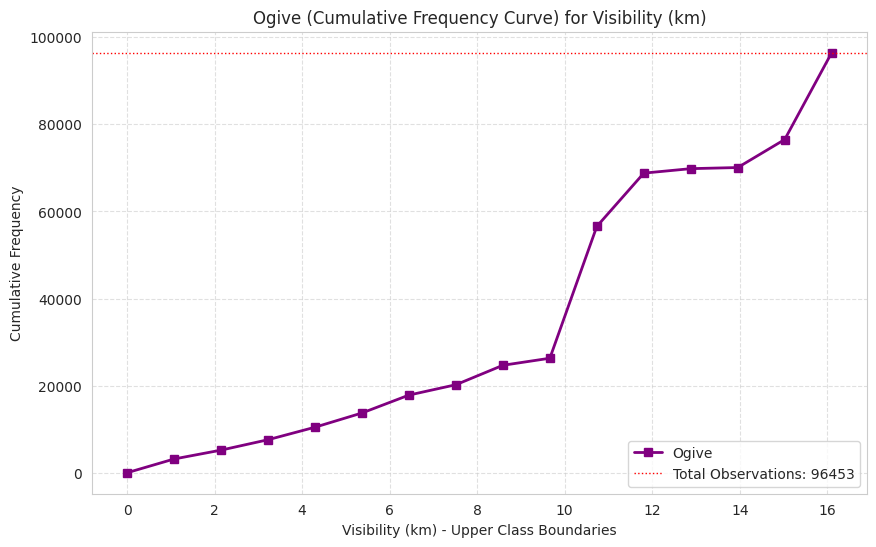

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SETUP AND DATA PREPARATION ---

# Load the dataset
try:
    df = pd.read_csv('weatherHistory.csv')
except FileNotFoundError:
    print("Error: 'weatherHistory.csv' not found. Please ensure the file is in the correct directory.")
    df = None # Set df to None if not found to prevent further errors

if df is not None:
    visibility_data = df['Visibility (km)']

    # Define the number of bins (classes)
    k = 15

    # Calculate bin edges
    min_vis = visibility_data.min()
    max_vis = visibility_data.max()
    bin_width = (max_vis - min_vis) / k
    bins = np.arange(min_vis, max_vis + bin_width, bin_width)

    # Calculate frequencies and bin edges for subsequent plots
    counts, bin_edges = np.histogram(visibility_data, bins=bins)

    # ----------------------------------------

    # --- 2. HISTOGRAM FOR VISIBILITY (km) ---
    # Shows the distribution of visibility data.
    plt.figure(figsize=(10, 6))
    plt.hist(visibility_data, bins=bins, edgecolor='black', alpha=0.7, color='gold')

    plt.title(f'Histogram of Visibility (km) (k={k} Bins)')
    plt.xlabel('Visibility (km)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.5)
    plt.axvline(visibility_data.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {visibility_data.mean():.2f} km')
    plt.legend()
    plt.savefig('visibility_histogram.png')
    plt.show()

    # ----------------------------------------

    # --- 3. FREQUENCY POLYGON FOR VISIBILITY (km) ---
    # Connects the midpoints of the class intervals at their frequency.
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.figure(figsize=(10, 6))
    plt.plot(bin_midpoints, counts, marker='o', linestyle='-', color='darkorange', linewidth=2, label='Frequency Polygon')

    # Connect to the x-axis for full closure
    plt.plot([bin_midpoints[0] - bin_width, bin_midpoints[0]], [0, counts[0]], ':', color='darkorange', alpha=0.5)
    plt.plot([bin_midpoints[-1], bin_midpoints[-1] + bin_width], [counts[-1], 0], ':', color='darkorange', alpha=0.5)

    plt.title(f'Frequency Polygon for Visibility (km) (k={k})')
    plt.xlabel('Visibility (km) - Class Midpoints')
    plt.ylabel('Frequency')
    plt.grid(axis='both', linestyle='--', alpha=0.6)
    plt.legend()
    plt.savefig('visibility_frequency_polygon.png')
    plt.show()

    # ----------------------------------------

    # --- 4. OGIVE (CUMULATIVE FREQUENCY) FOR VISIBILITY (km) ---
    # Shows the running total of observations below each upper class boundary.
    cumulative_counts = np.cumsum(counts)

    # Prepend 0 for the starting point
    cumulative_counts_with_zero = np.insert(cumulative_counts, 0, 0)
    plot_points = bin_edges

    plt.figure(figsize=(10, 6))
    plt.plot(plot_points, cumulative_counts_with_zero, marker='s', linestyle='-', color='purple', linewidth=2, label='Ogive')

    plt.title(f'Ogive (Cumulative Frequency Curve) for Visibility (km)')
    plt.xlabel('Visibility (km) - Upper Class Boundaries')
    plt.ylabel('Cumulative Frequency')
    plt.grid(axis='both', linestyle='--', alpha=0.6)
    plt.axhline(df.shape[0], color='red', linestyle=':', linewidth=1, label=f'Total Observations: {df.shape[0]}')
    plt.legend()
    plt.savefig('visibility_ogive.png')
    plt.show()

## Part 4: Analysis and Conclusion
The analysis covers three key weather: Temperature, Wind Speed, and Visibility which is revealing different kinds of patterns.Analysis of Visibility, Wind Speed and Temperature in histrogram are significant from each other.The mean is
$11.93 ^{\circ}\text{C}$ ,10.35km in visibility and
10.8km\h in wind speed.According to histogram the frequency has been the highest for visibility with 3000 Hz,then comes to the second place it is the wind speed and at the last position the temperature comes with 1400 Hz.The dataset coverd that  wind speed is highly positively skewed. On the other hand,visibility shows the strongly negatively skewed.Temperature displays the highest variability,showing the perfect temperature according to seasons.In conclusion,This dataset is confirming a weather which is  calm and clear clearteristically  for the majority of the time.






## Part 5: Challenges Faced

---

My challenging point was to select the perfect column beacause in my dataset there are lot of distracting data.Then problem was to Determine the Optimal Number of Bins ($k$) and calculate that. The calculation is difficult and varies from each other beacuse of the value.This separated and precised calculations with a full frequency table (including midpoints and cumulative frequency) for three different type of data to get the correctly respective graphs is challenging.